In [ ]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.15.0


In [ ]:
!pip install joblib

In [ ]:
import joblib

# Load the face model
face_model = keras.models.load_model('/content/drive/MyDrive/Datasets1/face_model_final.h5')

# Load the voice model
voice_model = keras.models.load_model('/content/drive/MyDrive/models/voice_model_final.h5')

from tensorflow import keras

phy_model = joblib.load('/content/drive/MyDrive/models/phy_model.h5')

In [ ]:
sampling_rate = 22050
max_input_length = 286155
emotions = ['Anxiety', 'Happiness', 'Sadness']
def load_and_preprocess_audio(file_path, target_length=max_input_length):
    audio, _ = librosa.load(file_path, sr=sampling_rate, duration=None)

    # Pad or truncate audio to the target length
    if len(audio) < target_length:
        audio = np.pad(audio, (0, target_length - len(audio)), 'constant')
    else:
        audio = audio[:target_length]

    # Extract features (as before)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=13), axis=1)
    chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sampling_rate), axis=1)
    mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sampling_rate), axis=1)

    return np.concatenate((mfccs, chroma, mel))

In [ ]:
test_audio_clip_path = '/content/drive/MyDrive/Datasets/Voice_Dataset/Anxiety/anx3.ogg'

# Preprocess the test audio clip
test_features = load_and_preprocess_audio(test_audio_clip_path)

predicted_probabilities = voice_model.predict(np.expand_dims(test_features, axis=0))

class_labels = emotions

# Find the index of 'Anxiety' in class_labels
anxiety_index = class_labels.index('Anxiety')

# Get the probability of 'Anxiety'
anxiety_probability = predicted_probabilities[0][anxiety_index]

print(f"Probability of Anxiety: {anxiety_probability:.2f}")


1/1 [==============================] - 0s 153ms/step
Probability of Anxiety: 0.99


In [ ]:
voice_anx = predicted_probabilities[0][0]

In [ ]:
voice_anx

0.9922666

In [ ]:
# Make predictions on an example image
example_image_path = '/content/drive/MyDrive/Datasets/Face_Dataset/train/Anxiety/anx2.jpg'
input_shape = (224, 224, 3)
img = keras.preprocessing.image.load_img(example_image_path, target_size=input_shape[:2])
img = keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img /= 255.0  # Preprocess the image

predictions = face_model.predict(img)

# Find the index of 'Anxiety' in emotions
anxiety_index = emotions.index('Anxiety')

# Get the probability of 'Anxiety'
anxiety_probability = predictions[0][anxiety_index]

print(f"Probability of Anxiety: {anxiety_probability * 100:.2f}%")


1/1 [==============================] - 0s 361ms/step
Probability of Anxiety: 25.16%


In [ ]:
face_anx = predictions[0][0] * 100

In [ ]:
face_anx

25.159737467765808

In [ ]:
!pip install firebase_admin

In [ ]:
import firebase_admin
import time
from firebase_admin import db, credentials

cred = credentials.Certificate('/content/drive/MyDrive/credentials.json') #include crdentials.json
firebase_admin.initialize_app(cred, {'databaseURL':'https://bp-value-default-rtdb.asia-southeast1.firebasedatabase.app/'})

#referencing the bp val



In [ ]:
#run whenever the bp is to be taken
def get_sleep():
  return db.reference('/BPM').get()
print(get_sleep())

19


In [ ]:
import pandas as pd
import numpy as np

columns = ['Age', 'Gender', 'Number of sleeping hours', 'BP_hist', 'Oxygen Level',
           'Pulse Rate', 'Exercise Routine', 'Food_amt', 'Food Intake',
           'Any External Pressure', 'Reason for Pressure', 'Do they know it?',
           'Mother', 'Father', 'Medication', 'bp_sys', 'bp_dia']

user_inputs = pd.DataFrame(columns=columns)

questions = {
    'Age': 'Enter your age: ',
    'Gender': 'Enter your gender (Male (1) /Female (0)): ',
    'Number of sleeping hours': 'Enter the number of sleeping hours: ',
    'BP_hist': 'Enter your blood pressure history (-1,0,1): ',
    'Oxygen Level': 'Enter your oxygen level: ',
    'Pulse Rate': 'Enter your pulse rate: ',
    'Exercise Routine': 'Do you have an exercise routine? (0/1): ',
    'Food_amt': 'Enter your food amount (0,1,2,3): ',
    'Food Intake': 'Enter your food intake (0/1): ',
    'Any External Pressure': 'Do you experience any external pressure? (0/1): ',
    'Reason for Pressure': 'If yes, what is the reason for the pressure? (0 to 15): ',
    'Do they know it?': 'Do you know that you have anxiety? (0/1): ',
    'Mother': 'Mother: 0/ Low BP -1/ High BP 1/ Sugar 2: ',
    'Father':  'Father: 0/ Low BP -1/ High BP 1/ Sugar 2: ',
    'Medication': 'Are you on any medication? (0-9): ',
    'bp_sys': 'Enter your systolic blood pressure: ',
    'bp_dia': 'Enter your diastolic blood pressure: ',
}

for column, question in questions.items():
    user_answer = input(question)
    user_inputs[column] = [user_answer]

user_predictions = phy_model.predict(user_inputs)

print("Model Predictions:", user_predictions)

Enter your age: 21
Enter your gender (Male (1) /Female (0)): 0
Enter the number of sleeping hours: 4
Enter your blood pressure history (-1,0,1): 0
Enter your oxygen level: 95
Enter your pulse rate: 75
Do you have an exercise routine? (0/1): 0
Enter your food amount (0,1,2,3): 0
Enter your food intake (0/1): 1
Do you experience any external pressure? (0/1): 0
If yes, what is the reason for the pressure? (0 to 15): 1
Do you know that you have anxiety? (0/1): 1
Mother: 0/ Low BP -1/ High BP 1/ Sugar 2: 0
Father: 0/ Low BP -1/ High BP 1/ Sugar 2: 0
Are you on any medication? (0-9): 0
Enter your systolic blood pressure: 180
Enter your diastolic blood pressure: 76
Model Predictions: [0]


In [ ]:
user_probabilities = phy_model.predict_proba(user_inputs)

probability_class_0 = user_probabilities[:, 0]

In [ ]:
for class_idx in range(2):
    probability_class = user_probabilities[:, class_idx]
    print(f"Probability of Class {class_idx}: {probability_class[0]:.2%}")

Probability of Class 0: 81.00%
Probability of Class 1: 19.00%


In [ ]:
phy_anx = probability_class[0]*100

In [ ]:
phy_anx

19.0

In [ ]:
anxiety = (face_anx + voice_anx + phy_anx)/300

In [ ]:
anxiety

0.15050668021043143

In [ ]:
from sklearn.preprocessing import normalize

def predict_depression():
    # Load the TF-IDF vectorizer
    tfidf_vectorizer_filename = '/content/drive/MyDrive/models/vectorizer.pkl'
    vectorizer = joblib.load(tfidf_vectorizer_filename)

    # Load the text classification model (trained on the filtered dataset)
    text_model_filename = '/content/drive/MyDrive/models/text_model.pkl'
    text_model = joblib.load(text_model_filename)

    # Define the list of emotion labels based on your filtered dataset
    emotion_labels = ["happy", "sadness", "anxiety"]

    # Initialize an empty list to store user responses
    user_responses = []

    # Ask 5 questions
    questions = [
        "How would you describe your current emotional state in a few words?",
        "What thoughts or situations are on your mind right now that might be affecting your mood?",
        "Is there anything bringing you joy or happiness at this moment?",
        "Do you feel any unease or sadness right now? If yes, can you share what might be contributing to it?",
        "In a few words, how would you describe the atmosphere around you at this very moment?"
    ]

    for i, question in enumerate(questions, start=1):
        user_input = input(f"Question {i}: {question}\nYour Answer: ")
        user_responses.append(user_input)

    # Transform user responses using the loaded vectorizer
    user_responses_tfidf = vectorizer.transform(user_responses)

    # Make predictions on user responses
    predicted_probabilities = text_model.predict_proba(user_responses_tfidf)

    # Normalize the probabilities
    normalized_probabilities = normalize(predicted_probabilities, norm='l1', axis=1)

    # Calculate the average predicted percentage for "sadness"
    average_anx_percentage = sum(normalized_probabilities[:, 2]) / len(normalized_probabilities)

    return average_anx_percentage

average_anx_percentage = predict_depression()
print(f"Average Normalized Predicted Percentage for 'Anxiety': {average_anx_percentage * 100:.2f}%")

Question 1: How would you describe your current emotional state in a few words?
Your Answer: very disturbing
Question 2: What thoughts or situations are on your mind right now that might be affecting your mood?
Your Answer: i dont know but it is very restless
Question 3: Is there anything bringing you joy or happiness at this moment?
Your Answer: i am very sad at the moment
Question 4: Do you feel any unease or sadness right now? If yes, can you share what might be contributing to it?
Your Answer: i am feeling very uneased
Question 5: In a few words, how would you describe the atmosphere around you at this very moment?
Your Answer: it is very disturbing
Average Normalized Predicted Percentage for 'Anxiety': 38.20%


In [ ]:
anxiety = (face_anx + voice_anx + phy_anx + average_anx_percentage)/300

In [ ]:
anxiety

0.15178001354376475

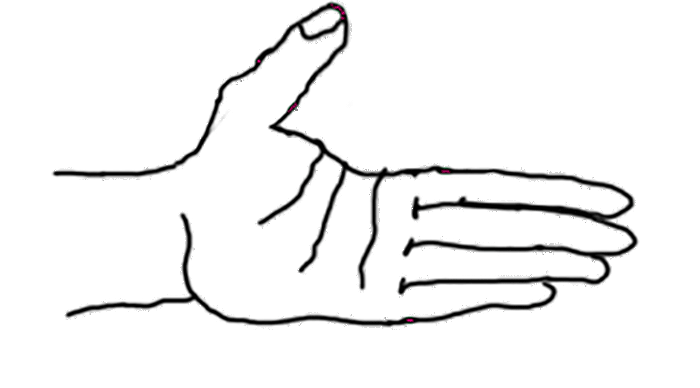

**->MILD ANXIETY**

**CHIN  MUDRA INSTRUCTIONS**

• Step 1: Sit comfortably with your back straight and your hands resting on your knees.

• Step 2: Join the tip of your thumb with the tip of your index finger, forming a circle.

• Step 3: Close your eyes and inhale and exhale slowly while holding this mudra.

• Practice this mudra for a minimum of 20 minutes.

 
    *Fact: Chin Mudra can help calm the mind and improve concentration.*
 

No emergency at the moment.


In [ ]:
import requests
from IPython.display import Image, display, Markdown

# Load the anxiety level from the integrated model
anxiety_level = anxiety

# Define paths to GIFs and instructions for mudras
mudra_paths = {
    "chin_mudra": "/content/drive/MyDrive/Datasets/Solutions/Chin-mudra.gif",
    "apana_mudra": "/content/drive/MyDrive/Datasets/Solutions/Apana-mudra.gif",
    "prana_mudra": "/content/drive/MyDrive/Datasets/Solutions/Prana-mudra.gif",
}

mudra_instructions = {
    "chin_mudra": [
        "**->MILD ANXIETY**\n",
        "**CHIN  MUDRA INSTRUCTIONS**\n",
        "• Step 1: Sit comfortably with your back straight and your hands resting on your knees.\n",
        "• Step 2: Join the tip of your thumb with the tip of your index finger, forming a circle.\n",
        "• Step 3: Close your eyes and inhale and exhale slowly while holding this mudra.\n",
        "• Practice this mudra for a minimum of 20 minutes.\n",
        " ",
        "    *Fact: Chin Mudra can help calm the mind and improve concentration.*",
        " "
    ],
    "apana_mudra": [
        "**->MODERATE ANXIETY**\n",
        "**APANA MUDRA INSTRUCTIONS**\n",
        "• Step 1: Sit comfortably with your back straight.\n",
        "• Step 2: Join the tips of your middle finger and ring finger to the tip of your thumb, while keeping the other two fingers extended.\n",
        "• Step 3: Close your eyes and inhale and exhale slowly while holding this mudra.\n",
        "• Practice this mudra for a minimum of 20 minutes.\n",
        " ",
        "     *Fact: Apana Mudra can help alleviate anxiety and promote a sense of balance.*",
        " "
    ],
    "prana_mudra": [
        "**->SEVERE ANXIETY**\n",
        "**PRANA MUDRA INSTRUCTIONS**\n",
        "• Step 1: Sit comfortably with your back straight.\n",
        "• Step 2: Touch the tips of your ring finger and little finger to the tip of your thumb, while keeping the other two fingers extended.\n",
        "• Step 3: Close your eyes and inhale and exhale slowly while holding this mudra.\n",
        "• Practice this mudra for a minimum of 20 minutes.\n",
        " ",
        "    *Fact: Prana Mudra is associated with vital life force energy.*",
        " "

    ],
}

# Determine which mudra to show based on anxiety level
if anxiety_level <= 0.4:
    mudra = "chin_mudra"
elif 0.4 < anxiety_level <= 0.6:
    mudra = "apana_mudra"
elif 0.6 < anxiety_level < 0.9:
    mudra = "prana_mudra"
else:
    mudra = None

# Display the mudra GIF and instructions with Markdown formatting
if mudra:
    display(Image(filename=mudra_paths[mudra]))
    formatted_instructions = mudra_instructions[mudra]
    display(Markdown('\n'.join(formatted_instructions)))

# Check if anxiety level is above 0.9
if anxiety_level > 0.9:
    print("\n**->EXTREME ANXIETY**")
    print("\n\033[91mEMERGENCY HELPLINE-- Toll-Free Mental Health Rehabilitation Helpline Kiran: 1800-599-0019\n")
    print("\033[0mFinding nearby mental healthcare centers and clinics...\n")

    # Function to fetch user's location using GPS coordinates
    def get_user_location():
        try:
            response = requests.get("https://ipinfo.io")
            data = response.json()
            if "loc" in data:
                loc = data["loc"].split(",")
                user_latitude, user_longitude = loc
                print("Location Data:", data)  # Print location data here
                return user_latitude, user_longitude
            else:
                return None
        except Exception as e:
            print(f"Error fetching user location: {str(e)}")
            return None

    # Get the user's location
    user_location = get_user_location()

    if user_location:
        user_latitude, user_longitude = user_location
        print(f"User's Location - Latitude: {user_latitude}, Longitude: {user_longitude}\n")
    else:
        print("Unable to fetch user's location.\n")

    # Function to find nearby mental healthcare centers and clinics using HERE Geocoding and Search API
    def find_nearby_mental_health_centers(latitude, longitude):
        try:
            here_api_key = "rgnKMs99zei9oKTYtYo0KSiEsomx2TUF88XMO12VP0c"
            here_api_url = f"https://discover.search.hereapi.com/v1/discover"
            params = {
                "at": f"{latitude},{longitude}",
                "q": "mental healthcare,anxiety,hospital",
                "apiKey": here_api_key,
            }
            response = requests.get(here_api_url, params=params)
            data = response.json()

            if "items" in data:
                healthcare_centers = data["items"]
                return healthcare_centers
            else:
                return []

        except Exception as e:
            print(f"Error finding nearby healthcare centers: {str(e)}")
            return []

    # Find nearby mental healthcare centers and clinics
    if user_location:
        nearby_healthcare_centers = find_nearby_mental_health_centers(user_latitude, user_longitude)

        if nearby_healthcare_centers:
            print("**Nearby Mental Healthcare Centres and Clinics:**\n")
            for idx, center in enumerate(nearby_healthcare_centers, 1):
                name = center.get("title", "N/A")
                contacts = center.get("contacts", [{}])[0]  # Get the first contact (if available)
                phone_numbers = contacts.get("phone", [{"value": "N/A"}])

                # Extract and join phone numbers
                phone_numbers_list = ', '.join([phone.get("value", "N/A") for phone in phone_numbers])

                print(f"{idx}) {name}")
                print(f"   Contact Numbers: {phone_numbers_list}\n")
        else:
            print("No nearby mental healthcare centers and clinics found.\n")
    else:
        print("No user location available.\n")

else:
    print("No emergency at the moment.")
